In [1]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept Ai/week 2/data.csv')

# 2(a) Check the info of the DataFrame
print("DataFrame Info:")
df.info()

# 2(b) Identify columns with dtypes=object and find their unique values
object_columns = df.select_dtypes(include="object").columns.tolist()
unique_values = {col: df[col].unique() for col in object_columns}

print("\nColumns with dtype=object:", object_columns)
print("\nUnique values of object columns:")
for col, values in unique_values.items():
    print(f"{col}: {values}")

# 2(c) Check for the total number of null values in each column
null_values = df.isnull().sum()
print("\nTotal Null Values in Each Column:")
print(null_values)

# 3. Drop all the columns with dtype=object and save in a new DataFrame
numeric_df = df.drop(columns=object_columns)

# Write the new DataFrame to a CSV file
numeric_df.to_csv('banknumericdata.csv', index=False)
print("\nNumeric DataFrame saved as 'banknumericdata.csv'.")

# 4. Read the new CSV and find summary statistics
bank_numeric_df = pd.read_csv('banknumericdata.csv')
summary_statistics = bank_numeric_df.describe()

print("\nSummary Statistics of 'banknumericdata.csv':")
print(summary_statistics)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB

Columns with dtype=object: []

Unique values of object columns:

Total Null Values in Each Column:
x    0
y    0
dtype: int64

Numeric DataFrame saved as 'banknumericdata.csv'.

Summary Statistics of 'banknumericdata.csv':
                x           y
count  100.000000  100.000000
mean    48.958341   72.735051
std      9.746379   16.658187
min     25.128485   31.707006
25%     41.526164   60.788586
50%     49.634970   72.179542
75%     56.762631   83.215080
max     70.346076  118.591217


In [4]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept Ai/week 2/medical_students_dataset.csv')

# 2. Check info of the DataFrame and identify columns with missing (null) values
print("DataFrame Info:")
df.info()

# Check for columns with missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# 3. Handle missing values
# Example strategies for filling missing values
# (You may choose methods based on column context, such as mean, median, or mode)

for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            # Fill missing categorical data with the most frequent value (mode)
            most_frequent = df[column].mode()[0]
            df[column].fillna(most_frequent, inplace=True)
            print(f"Filled missing values in column '{column}' with mode: {most_frequent}")
        else:
            # Fill missing numerical data with the mean value
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"Filled missing values in column '{column}' with mean: {mean_value}")

# Verify missing values after filling
print("\nMissing Values After Filling:")
print(df.isnull().sum())

# 4. Check for duplicate values and manage them
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")

if duplicate_count > 0:
    # Drop duplicate rows
    df = df.drop_duplicates()
    print(f"Duplicate rows dropped. New DataFrame shape: {df.shape}")

# Save the cleaned dataset if needed
df.to_csv('medical_student_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'medical_student_cleaned.csv'.")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Missing Values in Each Column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
We

<ipython-input-4-d1635083d14e>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)
<ipython-input-4-d1635083d14e>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Filled missing values in column 'Gender' with mode: Male
Filled missing values in column 'Height' with mean: 174.9471026685741
Filled missing values in column 'Weight' with mean: 69.97158509186075
Filled missing values in column 'Blood Type' with mode: B
Filled missing values in column 'BMI' with mean: 23.338869359639226
Filled missing values in column 'Temperature' with mean: 98.60094787707668
Filled missing values in column 'Heart Rate' with mean: 79.50376666666666
Filled missing values in column 'Blood Pressure' with mean: 114.55803333333333
Filled missing values in column 'Cholesterol' with mean: 184.4863611111111
Filled missing values in column 'Diabetes' with mode: No
Filled missing values in column 'Smoking' with mode: No

Missing Values After Filling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes  

Fare Statistics for First-Class Passengers:
Mean: 84.1546875, Median: 60.287499999999994, Max: 512.3292, Min: 0.0

Number of null values in 'Age': 30
DataFrame shape after dropping null values in 'Age': (186, 6)

First few rows of the modified DataFrame with one-hot encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  

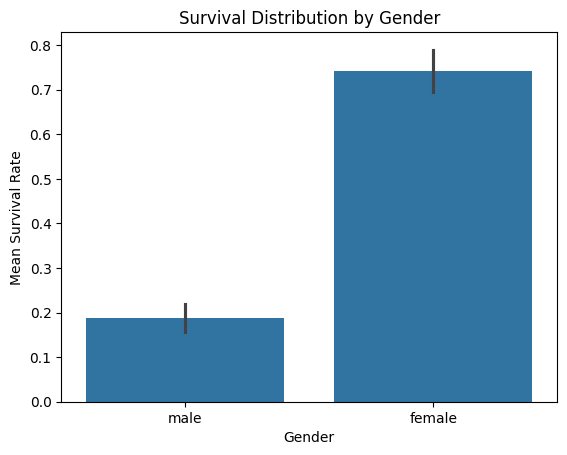

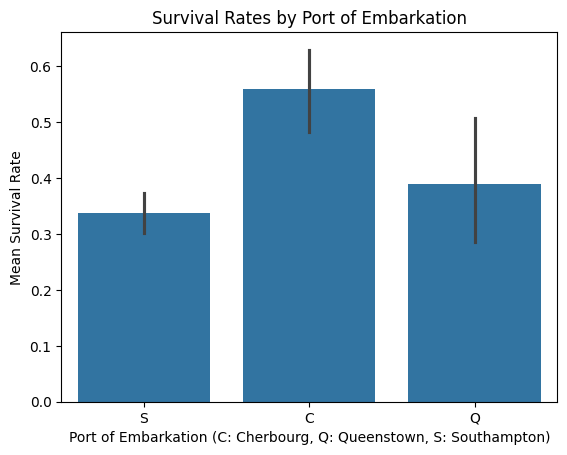

<ipython-input-9-e8a7e0ca7df4>:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()



Survival Rates by Age Group and Passenger Class:
Pclass  AgeGroup
1       Q1          0.809524
        Q2          0.761905
        Q3          0.666667
        Q4          0.777778
        Q5          0.506667
2       Q1          0.742857
        Q2          0.400000
        Q3          0.416667
        Q4          0.461538
        Q5          0.363636
3       Q1          0.333333
        Q2          0.197674
        Q3          0.283582
        Q4          0.166667
        Q5          0.088235
Name: Survived, dtype: float64


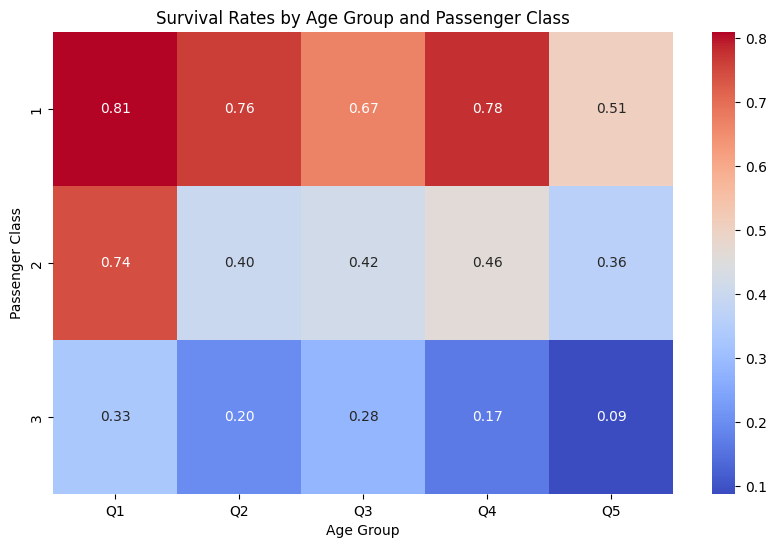

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Concept Ai/week 2/Titanic-Dataset.csv')

### Problem 1
# Subset the DataFrame for specified columns and filter rows where 'Pclass' == 1
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate mean, median, max, and min of 'Fare'
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

print("Fare Statistics for First-Class Passengers:")
print(f"Mean: {mean_fare}, Median: {median_fare}, Max: {max_fare}, Min: {min_fare}")

### Problem 2
# Check for null values in 'Age' column and count them
age_null_count = first_class_df['Age'].isnull().sum()
print(f"\nNumber of null values in 'Age': {age_null_count}")

# Drop rows with null values in 'Age'
first_class_df = first_class_df.dropna(subset=['Age'])
print(f"DataFrame shape after dropping null values in 'Age': {first_class_df.shape}")

### Problem 3
# Use one-hot encoding on 'Embarked' column
encoded_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, encoded_embarked], axis=1)

# Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

print("\nFirst few rows of the modified DataFrame with one-hot encoding:")
print(df.head())

### Problem 4
# Compare mean survival rates for different genders
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("\nMean Survival Rates by Gender:")
print(mean_survival_by_sex)

# Visualization: Survival distribution by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Distribution by Gender')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Gender')
plt.show()

### Problem 5

# Survival rates by ports of embarkation using one-hot encoded columns
ports = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

# Create a new column indicating the embarkation port
df['Embarked_Port'] = df[ports].idxmax(axis=1).str.replace('Embarked_', '')

# Visualize survival rates by port of embarkation
sns.barplot(x='Embarked_Port', y='Survived', data=df)
plt.title('Survival Rates by Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Port of Embarkation (C: Cherbourg, Q: Queenstown, S: Southampton)')
plt.show()


### Problem 6 (Optional)
# Break Age column into quantiles and analyze survival rates
df['AgeGroup'] = pd.qcut(df['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
survival_by_class_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()

print("\nSurvival Rates by Age Group and Passenger Class:")
print(survival_by_class_age)

# Visualization: Survival rates by Age Group and Pclass
plt.figure(figsize=(10, 6))
sns.heatmap(
    survival_by_class_age.unstack(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('Survival Rates by Age Group and Passenger Class')
plt.ylabel('Passenger Class')
plt.xlabel('Age Group')
plt.show()
